In [68]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import warnings #avoid warning flash
warnings.filterwarnings('ignore')
import seaborn as sns

df_dm=pd.read_csv("diabet.csv")
df_dm.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabeteFamilyHistory,Age,Result
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,NaN,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [69]:
df_dm.shape
#Rows,columns
#df_dm.columns
df_dm.dtypes


Pregnancies               int64
Glucose                   int64
BloodPressure             int64
SkinThickness             int64
Insulin                   int64
BodyMassIndex           float64
DiabeteFamilyHistory    float64
Age                       int64
Result                    int64
dtype: object

In [70]:
df_dm.info()
#DiabeteFamilyHistory  1 null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pregnancies           768 non-null    int64  
 1   Glucose               768 non-null    int64  
 2   BloodPressure         768 non-null    int64  
 3   SkinThickness         768 non-null    int64  
 4   Insulin               768 non-null    int64  
 5   BodyMassIndex         768 non-null    float64
 6   DiabeteFamilyHistory  767 non-null    float64
 7   Age                   768 non-null    int64  
 8   Result                768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
df_dm.describe()
#minimum of columns are 0 can not be possible. max insulin 846 not good 
#Replace them with so clean the data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabeteFamilyHistory,Age,Result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,767.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.472034,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331516,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.374000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [72]:
#check for zero values in data
for i in df_dm.columns:
    print(i,len(df_dm[df_dm[i]==0]))

Pregnancies 111
Glucose 5
BloodPressure 35
SkinThickness 227
Insulin 374
BodyMassIndex 11
DiabeteFamilyHistory 0
Age 0
Result 500


In [73]:
df_dm=df_dm.drop_duplicates()
df_dm.isnull().sum()
df_dm.isnull().any()

Pregnancies             False
Glucose                 False
BloodPressure           False
SkinThickness           False
Insulin                 False
BodyMassIndex           False
DiabeteFamilyHistory     True
Age                     False
Result                  False
dtype: bool

<AxesSubplot:xlabel='Result', ylabel='Glucose'>

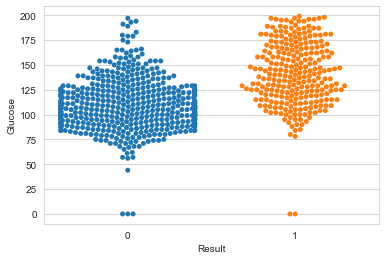

In [74]:
import seaborn as sns
#Relations between variables
sns.swarmplot(x="Result", y="Glucose", data=df_dm)

<AxesSubplot:xlabel='Result', ylabel='Age'>

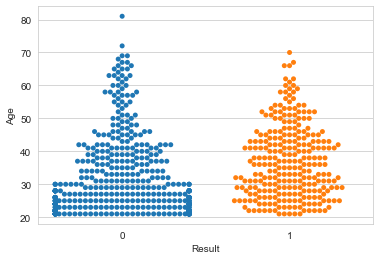

In [75]:
sns.swarmplot(x="Result", y="Age", data=df_dm)

In [76]:
rowNan=df_dm.isnull().any(axis=1)
rowsWithNan=df_dm[rowNan]
print(rowsWithNan)
rowNan=df_dm.isna().any()
#print(rowNan)
#rowsWithNan=df_dm[rowNan]
colsWithNan=df_dm.columns[rowNan].tolist()
print(colsWithNan)
# Fill null value with the mean value
df_dm["DiabeteFamilyHistory"].fillna(df_dm['DiabeteFamilyHistory'].mean(), inplace = True)
df_dm.head(5)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BodyMassIndex  \
1            1       85             66             29        0           26.6   

   DiabeteFamilyHistory  Age  Result  
1                   NaN   31       0  
['DiabeteFamilyHistory']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BodyMassIndex,DiabeteFamilyHistory,Age,Result
0,6,148,72,35,0,33.6,0.627000,50,1
1,1,85,66,29,0,26.6,0.472034,31,0
2,8,183,64,0,0,23.3,0.672000,32,1
3,1,89,66,23,94,28.1,0.167000,21,0
4,0,137,40,35,168,43.1,2.288000,33,1


In [77]:
print(df_dm[df_dm['BloodPressure']==0].shape[0])
print(df_dm[df_dm['Glucose']==0].shape[0])
print(df_dm[df_dm['SkinThickness']==0].shape[0])
print(df_dm[df_dm['Insulin']==0].shape[0])
print(df_dm[df_dm['BodyMassIndex']==0].shape[0])


35
5
227
374
11


Plots such as box plots and distribution plots come very handily in deciding which techniques to use
here by boxplot  and distplot mean or median will be  decided for (input15)

<AxesSubplot:xlabel='BloodPressure'>

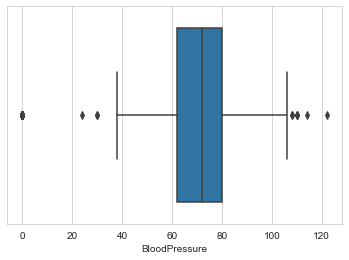

In [78]:
sns.boxplot(df_dm.BloodPressure)

<AxesSubplot:xlabel='Insulin'>

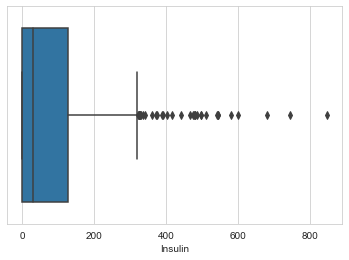

In [79]:
sns.boxplot(df_dm.Insulin)

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

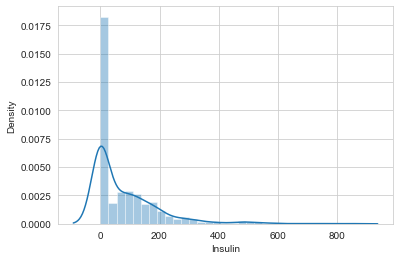

In [80]:
sns.distplot(df_dm.Insulin)

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

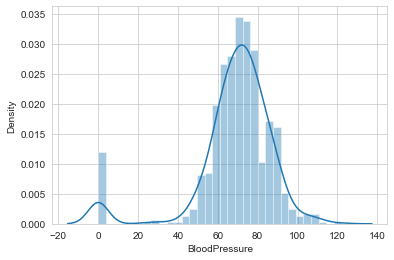

In [81]:
sns.distplot(df_dm.BloodPressure)

In [82]:
#replacing 0 values with median of that column
df_dm['Glucose']=df_dm['Glucose'].replace(0,df_dm['Glucose'].mean())#normal distribution
df_dm['BloodPressure']=df_dm['BloodPressure'].replace(0,df_dm['BloodPressure'].mean())#normal distribution
df_dm['SkinThickness']=df_dm['SkinThickness'].replace(0,df_dm['SkinThickness'].median())#skewed distribution
df_dm['Insulin']=df_dm['Insulin'].replace(0,df_dm['Insulin'].median())#skewed distribution
df_dm['BodyMassIndex']=df_dm['BodyMassIndex'].replace(0,df_dm['BodyMassIndex'].median())#skewed distribution

In [83]:
print(df_dm[df_dm['BloodPressure']==0].shape[0])
print(df_dm[df_dm['Glucose']==0].shape[0])
print(df_dm[df_dm['SkinThickness']==0].shape[0])
print(df_dm[df_dm['Insulin']==0].shape[0])
print(df_dm[df_dm['BodyMassIndex']==0].shape[0])

0
0
0
0
0


<AxesSubplot:xlabel='Result', ylabel='count'>

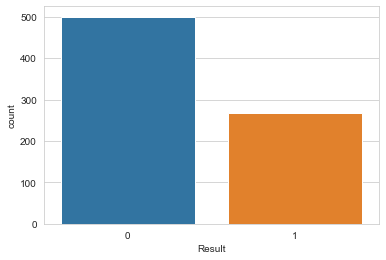

In [84]:
sns.countplot('Result',data=df_dm)

**Conclusion** :We observe that number of people who do not have diabetes is far more than people have diabetes and this indicates that our data is imbalanced

- _Count Plot_ : to see if the dataset is balanced or not
- _Histograms_ : to see if data is normally distributed or skewed
- _Box Plot_ : to analyse the distribution and see the outliers
- _Scatter plots_ : to understand relationship between any two variables
- _Pair plot_ : to create scatter plot between all the variables



_Histograms_ also help us to see possible outliers.

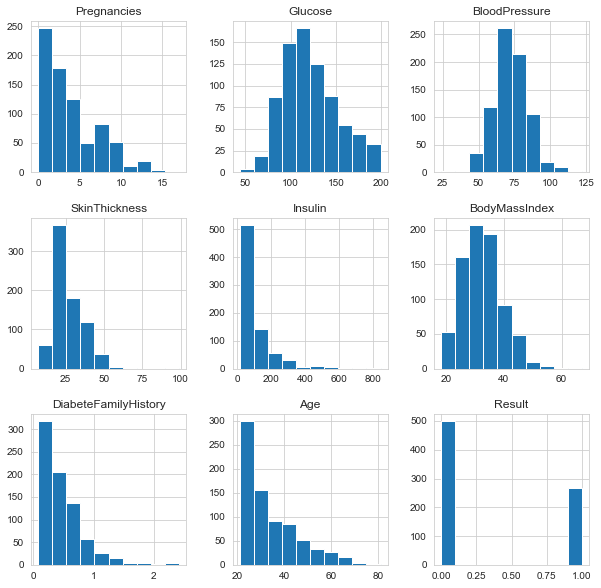

In [85]:
df_dm.hist(bins=10,figsize=(10,10))
plt.show()

 From Histograms we see that only glucose and Blood Pressure are normally distributed

Boxplots in short, is another useful technique to review the distribution of each attribute’s distribution.
It is univariate in nature and summarizes the distribution of each attribute
The dots outside the whiskers signifies the outlier values. Outlier values would be 1.5 times greater than the 
size of the spread of the middle data.


<AxesSubplot:xlabel='DiabeteFamilyHistory'>

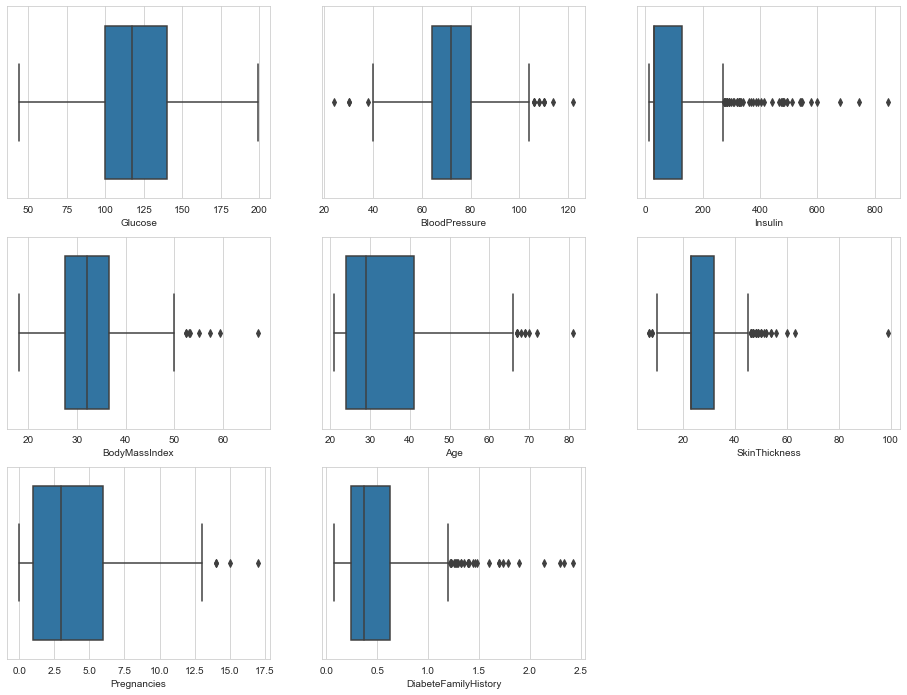

In [86]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=df_dm)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=df_dm)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=df_dm)
plt.subplot(3,3,4)
sns.boxplot(x='BodyMassIndex',data=df_dm)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=df_dm)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=df_dm)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=df_dm)
plt.subplot(3,3,8)
sns.boxplot(x='DiabeteFamilyHistory',data=df_dm)

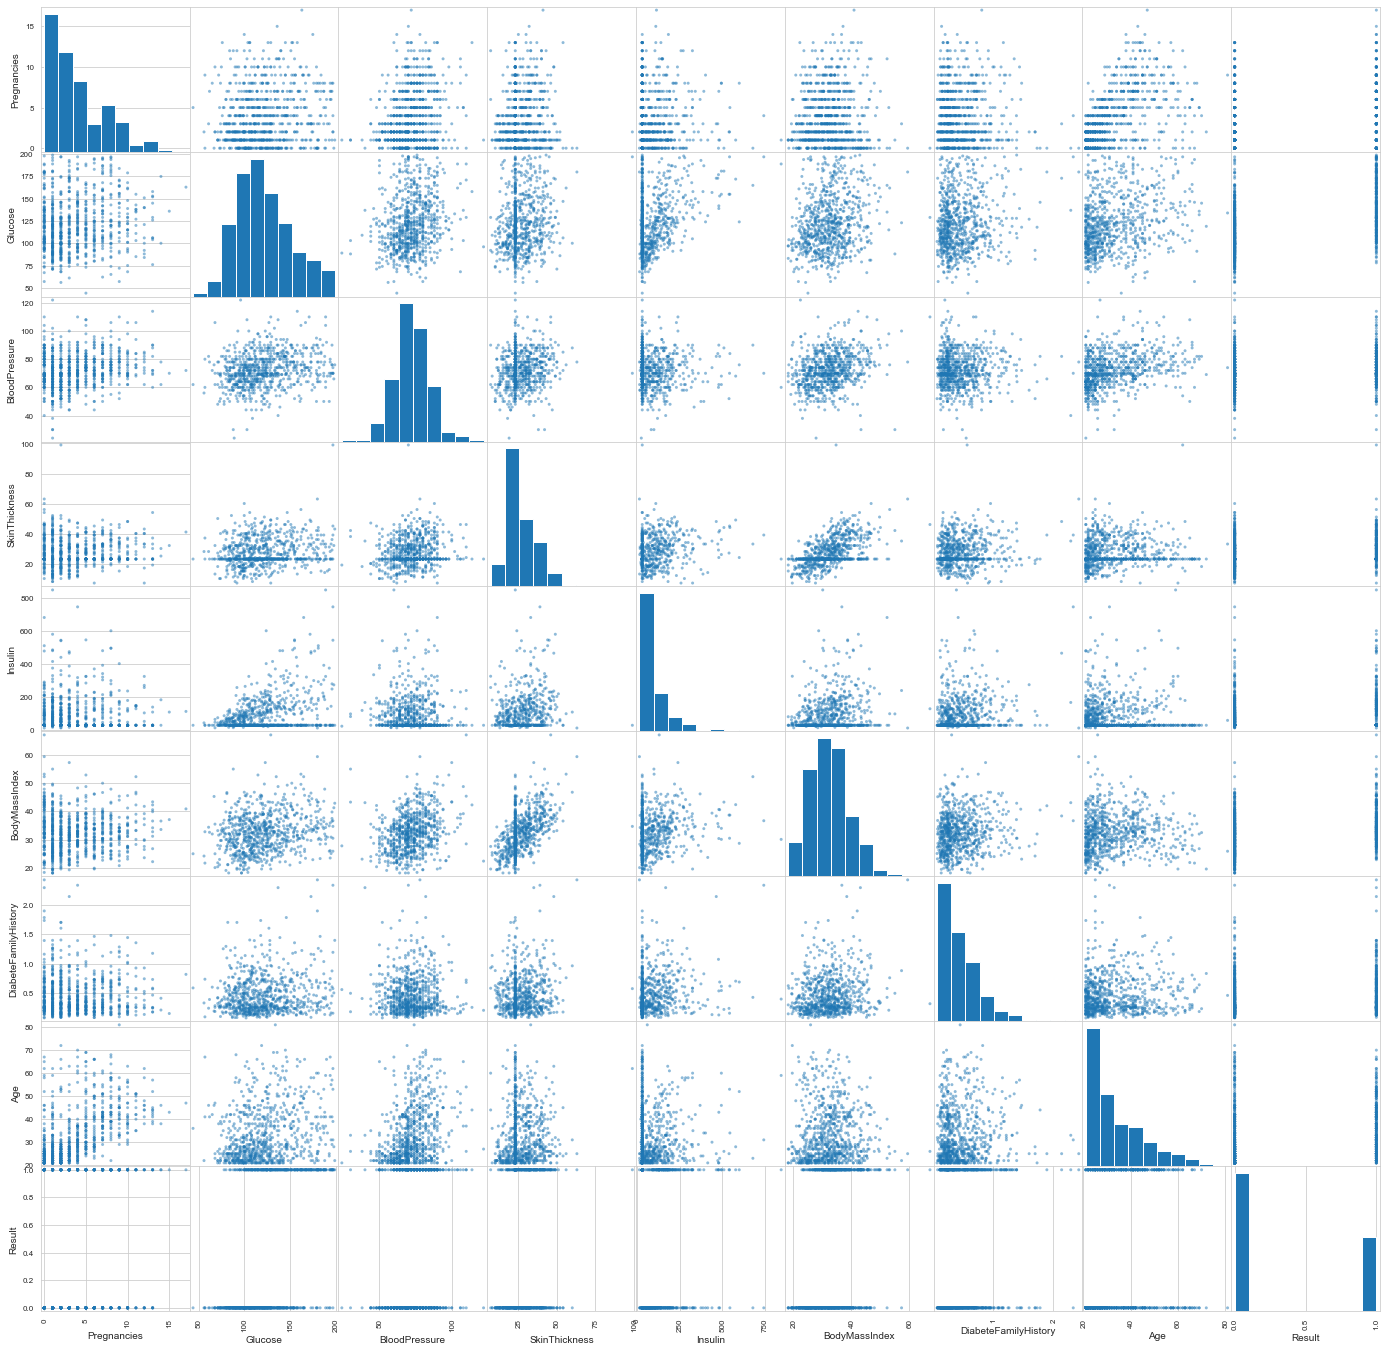

In [87]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_dm,figsize=(24,24));
#observe 5th plot in pregnancies with insulin,  women with higher number of pregnancies have lower insulin and skintickness
#scatter matrix is used to visualize relations between combinations of variables

__Feature Selection__
The value of Pearson's Correlation Coefficient can be between -1 to +1. 
"1" means that they are highly correlated and "0" means that no correlation occurs.Also color helps to understand correlations.

<AxesSubplot:>

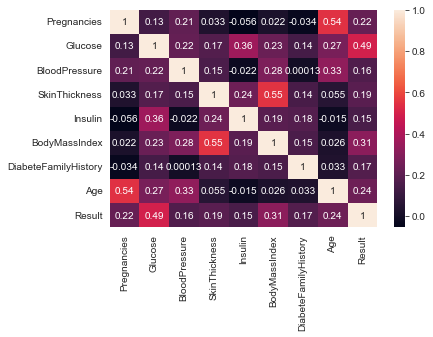

In [88]:
correlation=df_dm.corr()
sns.heatmap(correlation, annot=True)

The last row 'Result' and  its correlation scores with different features are important.
We can observe that Glucose, BMI and Age are the most correlated with Result.
On the other hand BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated.
So we can drop them. \
_Ex_:Age and pregnancies have strong correlation of 0.54

#### Binning of Data

Binning is a way to group a number of more or less continuous values into a smaller number of "bins"
```
data['Age']=data['Age'].astype(int)
data.loc[data['Age'] <= 16, 'Age']= 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[data['Age'] > 64, 'Age'] = 4

data['Glucose']=data['Glucose'].astype(int)
data.loc[data['Glucose'] <= 80, 'Glucose']= 0
data.loc[(data['Glucose'] > 80) & (data['Glucose'] <= 100), 'Glucose'] = 1
data.loc[(data['Glucose'] > 100) & (data['Glucose'] <= 125), 'Glucose'] = 2
data.loc[(data['Glucose'] > 125) & (data['Glucose'] <= 150), 'Glucose'] = 3
data.loc[data['Glucose'] > 150, 'Glucose'] = 4

data['BloodPressure']=data['BloodPressure'].astype(int)
data.loc[data['BloodPressure'] <= 50, 'BloodPressure']= 0
data.loc[(data['BloodPressure'] > 50) & (data['BloodPressure'] <= 65), 'BloodPressure'] = 1
data.loc[(data['BloodPressure'] > 65) & (data['BloodPressure'] <= 80), 'BloodPressure'] = 2
data.loc[(data['BloodPressure'] > 80) & (data['BloodPressure'] <= 100), 'BloodPressure'] = 3
data.loc[data['BloodPressure'] > 100, 'BloodPressure'] = 4


######  Or

df.loc[(df.Outcome == 1) & (df.Insulin <= 100) , "Insulin"] = 70
df.loc[(df.Outcome == 0) & (df.Insulin >= 200 ) , "Insulin"] = 200
df.loc[(df.Outcome == 0) & (df.Glucose >= 175 ) , "Glucose"] = 175
df.loc[(df.Outcome == 1) & (df.Glucose <= 80 ) , "Glucose"] = 80
df.loc[(df.Outcome == 0) & (df.Pregnancies >= 13 ) , "Pregnancies"] = 13
df.loc[(df.Outcome == 0) & (df.DiabetesPedigreeFunction >= 1.3 ) , "DiabetesPedigreeFunction"] = 1.3
df.loc[(df.Outcome == 0) & (df.BMI >= 50 ) , "BMI"] = 50
```


###### Feature Engineering
**Creating new features for analysis ( use existing features to create new features)**
```
df["i_g"] = (df.Glucose * df.Insulin) 
#df.Pregnancies = df.Pregnancies.replace(0,1)
df["g_p"] = (df.Glucose * df.Pregnancies) 

df["b_b"] = (df.BloodPressure * df.Age)
```

In [89]:
df_selected=df_dm.drop(['BloodPressure','Insulin','DiabeteFamilyHistory'],axis='columns')
df_selected

,Pregnancies,Glucose,SkinThickness,BodyMassIndex,Age,Result
0,6,148.0,35,33.6,50,1
1,1,85.0,29,26.6,31,0
2,8,183.0,23,23.3,32,1
3,1,89.0,23,28.1,21,0
4,0,137.0,35,43.1,33,1
...,...,...,...,...,...,...
763,10,101.0,48,32.9,63,0
764,2,122.0,27,36.8,27,0
765,5,121.0,23,26.2,30,0
766,1,126.0,23,30.1,47,1


##### Methods for finding Outlier values
- Box plots 
- Scatter plot
- Z score



In [90]:
from sklearn.preprocessing import QuantileTransformer
x=df_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
df_new=quantile.transform(X)
df_new=pd.DataFrame(X)
df_new.columns =['Pregnancies', 'Glucose','SkinThickness','BodyMassIndex','Age','Result']
df_new.head()

,Pregnancies,Glucose,SkinThickness,BodyMassIndex,Age,Result
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


Instead of a standart scaler it is better to use a QuantileTransformer
**QuantileTransformer** provides non-linear transformations in which distances between marginal outliers and inliers are shrunk.This method transforms the features to follow a uniform or a normal distribution.outliers are still present in this dataset but their impact has been reduced and we will check it byboxplot again.
**StandardScaler** standardizes a feature by subtracting the mean and then scaling to unit variance. Unit variance means dividing all the values by the standard deviation. One of the most common forms of pre-processing consists of a simple linear rescaling of the input variables.


In [91]:
#StandardScaler 
#from sklearn.preprocessing import StandardScaler
#sc_X = StandardScaler()
#X =  pd.DataFrame(sc_X.fit_transform(df_dm.drop(["Result"],axis = 1),),
#        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
#       'BodyMassIndex', 'DiabeteFamilyHistory', 'Age'])
#X.head()

<AxesSubplot:xlabel='SkinThickness'>

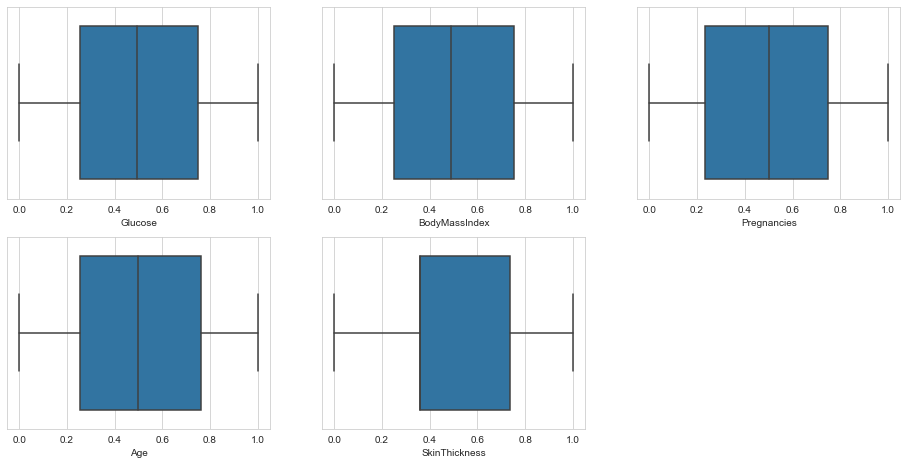

In [92]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=df_new['Glucose'],data=df_new)
plt.subplot(3,3,2)
sns.boxplot(x=df_new['BodyMassIndex'],data=df_new)
plt.subplot(3,3,3)
sns.boxplot(x=df_new['Pregnancies'],data=df_new)
plt.subplot(3,3,4)
sns.boxplot(x=df_new['Age'],data=df_new)
plt.subplot(3,3,5)
sns.boxplot(x=df_new['SkinThickness'],data=df_new)

Now we will split data and result will be as y


In [93]:
target_name='Result'
y= df_new[target_name]#given predictions - training data 
X=df_new.drop(target_name,axis=1)#dropping the Outcome column and keeping all other columns as X
X.head() # contains only independent features 


,Pregnancies,Glucose,SkinThickness,BodyMassIndex,Age
0,0.747718,0.810300,0.801825,0.591265,0.889831
1,0.232725,0.091265,0.644720,0.213168,0.558670
2,0.863755,0.956975,0.357888,0.077575,0.585398
3,0.232725,0.124511,0.357888,0.284224,0.000000
4,0.000000,0.721643,0.801825,0.926988,0.606258


In [94]:
y.head()
# Now we will do TRAIN TEST SPLIT

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Result, dtype: float64

In [95]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2,random_state=0)#splitting data in 80% train, 20%test

In [96]:
X_test.shape,y_test.shape

((154, 5), (154,))

### Algoritms 

### 1- KNearestNeighbors

In [97]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

pred = knn.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

print(classification_report(y_test,pred))
print('Accuracy Score: ',round(accuracy_score(y_test,pred), ndigits=2))

[[82 25]
 [16 31]]
              precision    recall  f1-score   support

         0.0       0.84      0.77      0.80       107
         1.0       0.55      0.66      0.60        47

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.70       154
weighted avg       0.75      0.73      0.74       154

Accuracy Score:  0.73


Text(0, 0.5, 'Error Rate')

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

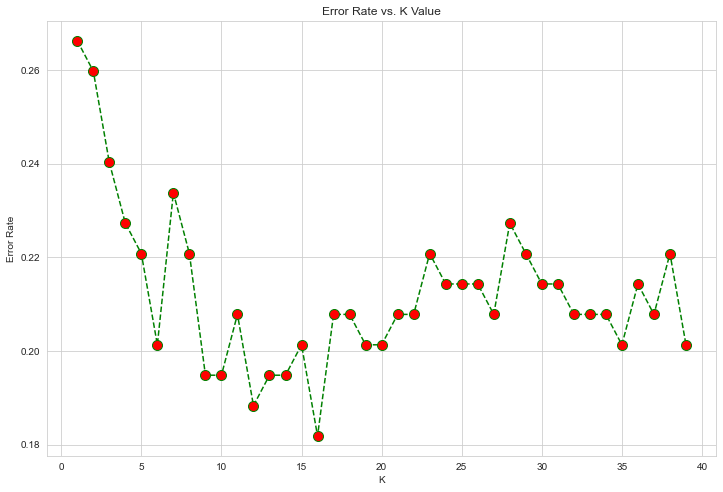

In [98]:
error_rate = []
test_scores = []
train_scores = []


for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='green', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [99]:
#error rate for k=16 is minimum (tuning)
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
knc=KNeighborsClassifier(n_neighbors=16)
knc.fit(X_train, y_train)
prediction_knn=knc.predict(X_test)
print(confusion_matrix(y_test,prediction_knn))
print('\n')
print(classification_report(y_test,prediction_knn))
print('Accuracy Score: ',round(accuracy_score(y_test,prediction_knn), ndigits=2))


[[97 10]
 [18 29]]


              precision    recall  f1-score   support

         0.0       0.84      0.91      0.87       107
         1.0       0.74      0.62      0.67        47

    accuracy                           0.82       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.81      0.82      0.81       154

Accuracy Score:  0.82


In [100]:
df_new.head()

,Pregnancies,Glucose,SkinThickness,BodyMassIndex,Age,Result
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


In [101]:
knc

KNeighborsClassifier(n_neighbors=16)

In [102]:
knc.predict([[0.747718,0.810300,0.801825,0.591265,0.889831]])


array([1.])

In [103]:
df_new['Result'].iloc[0] # first  row of dataframe

1.0

In [104]:
knc.predict([[0.232725,0.091265,0.644720,0.213168,0.558670]])


array([0.])

In [105]:
df_new['Result'].iloc[1] # second row of dataframe


0.0

### 2-Logistic Regression

In [106]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(X_train,y_train) 
#X_train, X_test, y_train, y_test
y_pred=reg.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",reg.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.89      0.86       107
         1.0       0.69      0.57      0.63        47

    accuracy                           0.79       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[95 12]
 [20 27]]
Training Score:
 76.2214983713355
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197


In [107]:
print(accuracy_score(y_test,y_pred)*100)

79.22077922077922


### 3-SVC

In [108]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train,y_train)    

svm_acc= accuracy_score(y_test,svm.predict(X_test))


print("Train Set Accuracy:"+str(accuracy_score(y_train,svm.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,svm.predict(X_test))*100))

Train Set Accuracy:78.0130293159609
Test Set Accuracy:77.27272727272727


In [109]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",svc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       107
         1.0       0.65      0.55      0.60        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[93 14]
 [21 26]]
Training Score:
 78.0130293159609
Mean Squared Error:
 0.22727272727272727
R2 score is:
 -0.07178365480214755
77.27272727272727


### 4-Naive Bayes

In [110]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gnb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print("Accuracy Score:\n",gnb.score(X_train,y_train)*100)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.81      0.83       107
         1.0       0.61      0.66      0.63        47

    accuracy                           0.77       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[87 20]
 [16 31]]
Training Score:
 75.8957654723127
Mean Squared Error:
 0.23376623376623376
R2 score is:
 -0.10240604493935179
Accuracy Score:
 75.8957654723127


### 5-DECISION TREE CLASSIFIER

In [111]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(X_train, y_train)


dtc_acc= accuracy_score(y_test,dtc.predict(X_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,dtc.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,dtc.predict(X_test))*100))

Train Set Accuracy:80.61889250814332
Test Set Accuracy:77.92207792207793


In [112]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X_train,y_train)
y_pred=dtree.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",dtree.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.80      0.88      0.84       107
         1.0       0.65      0.51      0.57        47

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154

Confusion Matrix:
 [[94 13]
 [23 24]]
Training Score:
 81.75895765472313
Mean Squared Error:
 0.23376623376623376
R2 score is:
 -0.10240604493935179
76.62337662337663


### 6-RandomForestClassifier

In [113]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion= 'entropy', n_estimators= 200, random_state= 0)
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",rfc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.86      0.86       107
         1.0       0.68      0.68      0.68        47

    accuracy                           0.81       154
   macro avg       0.77      0.77      0.77       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix:
 [[92 15]
 [15 32]]
Training Score:
 100.0
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358
80.51948051948052


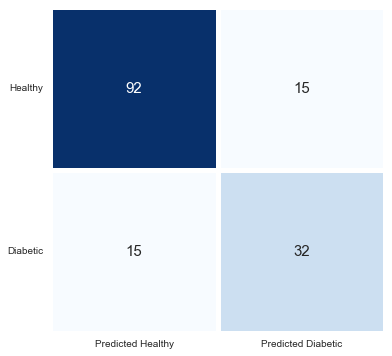

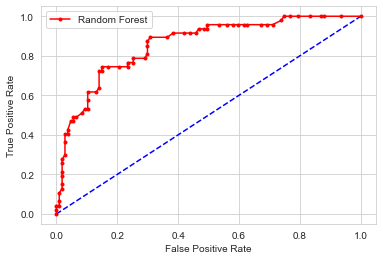

In [114]:
import seaborn as sns
from sklearn.metrics import roc_curve

#https://www.kaggle.com/siddheshera/pima-diabetes-with-eda-12-models-beginner

cm = confusion_matrix(y_test, y_pred)
# Visualizing Confusion Matrix
plt.figure(figsize = (6, 6))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['Healthy', 'Diabetic'], xticklabels = ['Predicted Healthy', 'Predicted Diabetic'])
plt.yticks(rotation = 0)
plt.show()
#RF
predicted_probab = rfc.predict_proba(X_test)
predicted_probab = predicted_probab[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab)
from matplotlib import pyplot
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
pyplot.plot(fpr, tpr, marker='.', color='red', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()


### 7-AdaBoostClassifier

In [115]:
from sklearn.ensemble import AdaBoostClassifier
adb = AdaBoostClassifier(base_estimator = None)
adb.fit(X_train,y_train)
y_pred=adb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",adb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.83      0.85      0.84       107
         1.0       0.64      0.60      0.62        47

    accuracy                           0.77       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.77      0.77      0.77       154

Confusion Matrix:
 [[91 16]
 [19 28]]
Training Score:
 81.75895765472313
Mean Squared Error:
 0.22727272727272727
R2 score is:
 -0.07178365480214755
77.27272727272727


### 8-Gradient Boosting Classifier

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred=gbc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",gbc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.86      0.84      0.85       107
         1.0       0.65      0.68      0.67        47

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.79      0.79      0.79       154

Confusion Matrix:
 [[90 17]
 [15 32]]
Training Score:
 89.41368078175896
Mean Squared Error:
 0.2077922077922078
R2 score is:
 0.020083515609465197
79.22077922077922


### 9-XGBClassifier

In [117]:
from xgboost import XGBClassifier #install

#xgb =XGBClassifier(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
 #               max_depth = 5, alpha = 10, n_estimators = 10)
xgb=XGBClassifier(n_estimators=100, learning_rate=0.1, gamma=0, subsample=0.5,colsample_bytree=1, max_depth=8)

xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",xgb.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
xbg_accuracy=print(accuracy_score(y_test,y_pred)*100)

[12:13:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Classification Report is:
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86       107
         1.0       0.69      0.62      0.65        47

    accuracy                           0.80       154
   macro avg       0.76      0.75      0.76       154
weighted avg       0.79      0.80      0.80       154

Confusion Matrix:
 [[94 13]
 [18 29]]
Training Score:
 97.06840390879479
Mean Squared Error:
 0.2012987012987013
R2 score is:
 0.05070590574666933
79.87012987012987


### 10-ExtraTreesClassifier

In [118]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100, random_state=0)
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("Classification Report is:\n",classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print("Training Score:\n",etc.score(X_train,y_train)*100)
print("Mean Squared Error:\n",mean_squared_error(y_test,y_pred))
print("R2 score is:\n",r2_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

Classification Report is:
               precision    recall  f1-score   support

         0.0       0.85      0.88      0.86       107
         1.0       0.70      0.64      0.67        47

    accuracy                           0.81       154
   macro avg       0.77      0.76      0.76       154
weighted avg       0.80      0.81      0.80       154

Confusion Matrix:
 [[94 13]
 [17 30]]
Training Score:
 100.0
Mean Squared Error:
 0.19480519480519481
R2 score is:
 0.08132829588387358
80.51948051948052
